**PROJECT: HANOI AIR QUALITY ANALYSIS**

##1: Import libraries

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import plotly.express as px

%matplotlib inline

##2: Import data

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('hanoi-aqi-weather-data.csv')  # Replace 'file.csv' with the path to your CSV file

# Convert 'Local Time' column to datetime object
df['Local Time'] = pd.to_datetime(df['Local Time'])

# Set 'Local Time' column as index
df.set_index('Local Time', inplace=True)

# Display the DataFrame
df  # Use df.head() to display the first few rows of the DataFrame

,UTC Time,City,Country Code,Timezone,AQI,CO,NO2,O3,PM10,PM25,SO2,Clouds,Precipitation,Pressure,Relative Humidity,Temperature,UV Index,Wind Speed
Local Time,,,,,,,,,,,,,,,,,,
2023-06-08 00:00:00,2023-06-07T17:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,118,168.7,32.3,74.7,52.5,42.00,57.3,37,0.50,1004,87,29.3,0.0,1.33
2023-06-08 01:00:00,2023-06-07T18:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,115,169.8,32.0,66.0,51.3,41.00,64.0,50,1.00,1004,88,29.0,0.0,1.00
2023-06-08 02:00:00,2023-06-07T19:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,112,166.7,29.3,63.7,50.0,40.00,66.0,62,1.00,1003,89,28.9,0.0,0.66
2023-06-08 03:00:00,2023-06-07T20:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,121,163.6,26.7,61.3,53.8,43.00,68.0,75,0.50,1003,90,28.7,0.0,0.33
2023-06-08 04:00:00,2023-06-07T21:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,134,160.5,24.0,59.0,60.0,48.00,70.0,87,0.00,1003,92,28.6,0.0,1.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-07 20:00:00,2024-06-07T13:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,67,968.9,21.7,27.3,35.4,20.09,4.0,70,1.00,1003,89,28.2,0.0,2.00
2024-06-07 21:00:00,2024-06-07T14:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,55,957.0,19.4,29.1,23.9,14.10,4.0,66,1.75,1004,92,27.5,0.0,2.00
2024-06-07 22:00:00,2024-06-07T15:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,49,1583.2,20.3,35.2,20.6,11.73,4.0,62,2.25,1004,95,26.7,0.0,2.00


##3: Exploratory Data Analysis

#3.1. Summary Statistics

In [3]:
df.describe()

,AQI,CO,NO2,O3,PM10,PM25,SO2,Clouds,Precipitation,Pressure,Relative Humidity,Temperature,UV Index,Wind Speed
count,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000
mean,116.585689,689.296736,29.826806,52.687396,64.847016,50.093733,67.637799,72.991260,0.358562,1010.077154,79.274887,25.037881,1.260085,1.545976
std,55.780160,1252.939417,37.224108,42.986051,62.242520,51.428854,50.246253,28.078716,1.269800,7.758417,15.033467,5.917315,1.837839,0.806536
min,21.000000,9.000000,2.000000,1.000000,1.300000,1.000000,0.000000,0.000000,0.000000,995.000000,17.000000,8.600000,0.000000,0.000000
25%,76.000000,129.600000,11.000000,21.300000,30.600000,23.500000,26.000000,61.500000,0.000000,1004.000000,70.000000,20.800000,0.000000,1.000000
50%,102.000000,202.000000,17.300000,39.000000,46.000000,35.000000,63.000000,79.000000,0.000000,1009.000000,84.000000,26.200000,0.600000,1.330000
75%,151.000000,605.000000,30.000000,73.000000,72.500000,54.500000,99.000000,100.000000,0.000000,1016.000000,92.000000,29.200000,2.000000,2.000000
max,500.000000,15956.200000,378.000000,248.000000,604.000000,446.000000,368.000000,100.000000,24.250000,1033.000000,100.000000,37.600000,11.400000,6.700000


#3.2. Air Quality Index (AQI)

3.2.1. Hanoi hourly AQI throughout the year

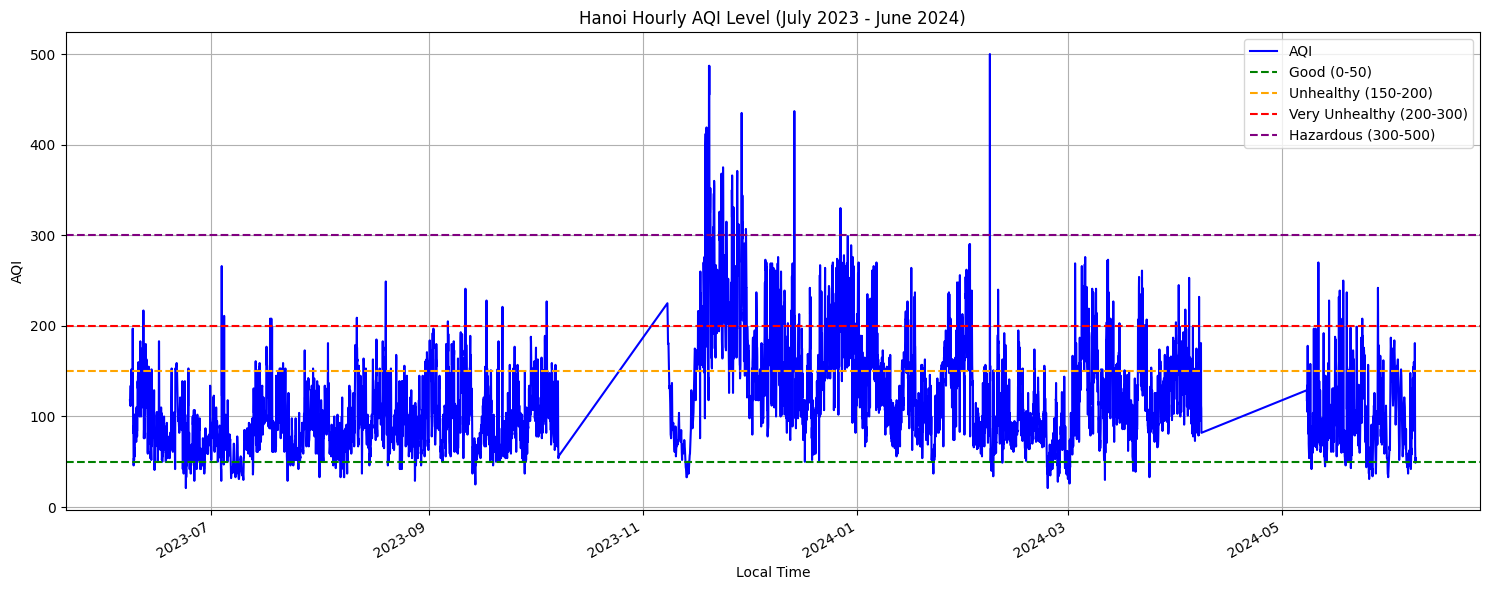

Time with the highest AQI level: (Timestamp('2024-02-07 19:00:00'), 500)


In [5]:
# Plot the AQI time series line plot
plt.figure(figsize=(15, 6))
df['AQI'].plot(kind='line', color='b')

# Add labels and title
plt.xlabel('Local Time')
plt.ylabel('AQI')
plt.title('Hanoi Hourly AQI Level (July 2023 - June 2024)')
# Add horizontal lines for unhealthy levels
plt.axhline(y=50, color='green', linestyle='--', label='Good (0-50)')
plt.axhline(y=150, color='orange', linestyle='--', label='Unhealthy (150-200)')
plt.axhline(y=200, color='red', linestyle='--', label='Very Unhealthy (200-300)')
plt.axhline(y=300, color='purple', linestyle='--', label='Hazardous (300-500)')

# Show legend
plt.legend()
# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Find the time with the highest AQI level
highest_aqi_time = df['AQI'].idxmax(), df['AQI'].max()
print("Time with the highest AQI level:", highest_aqi_time)

3.2.2. Hanoi hourly AQI for months with hazardous AQI level

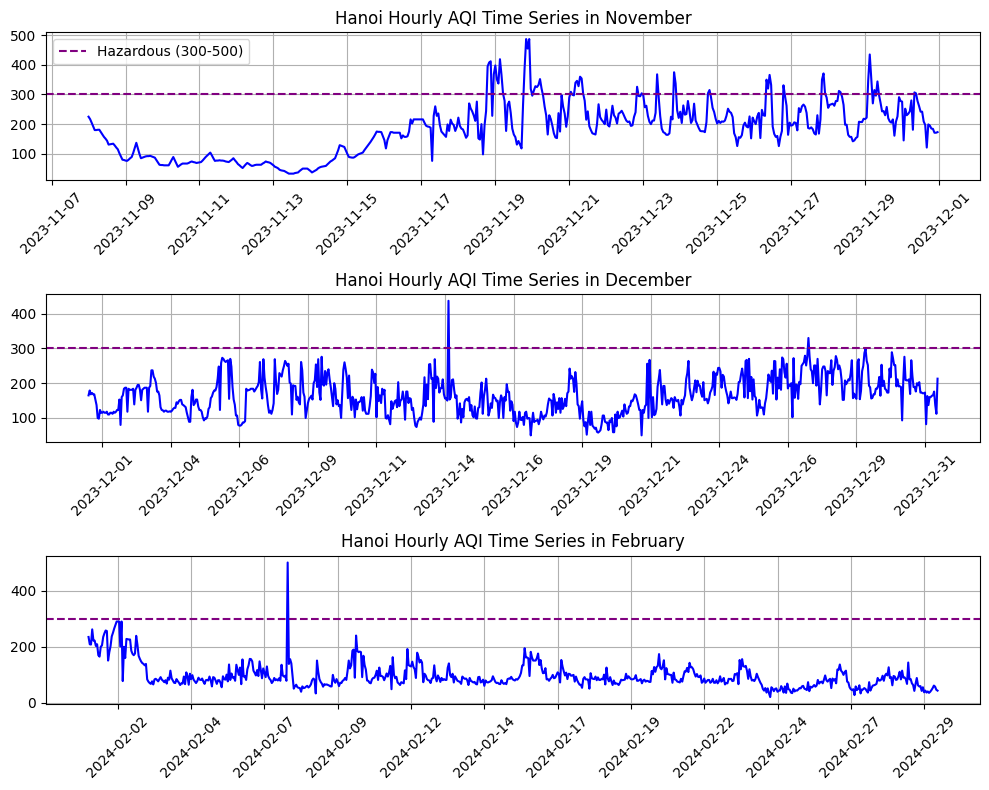

In [6]:
# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Line Plot November AQI data
axs[0].plot(df['2023-11-01':'2023-11-30']["AQI"], color='b')
axs[0].set_title('Hanoi Hourly AQI Time Series in November')
axs[0].grid(True)
axs[0].axhline(y=300, color='purple', linestyle='--', label='Hazardous (300-500)')
axs[0].legend()

# Line Plot December AQI data
axs[1].plot(df['2023-12-01':'2023-12-31']["AQI"], color='b')
axs[1].set_title('Hanoi Hourly AQI Time Series in December')
axs[1].grid(True)
axs[1].axhline(y=300, color='purple', linestyle='--', label='Hazardous (300-500)')

# Line Plot February AQI data
axs[2].plot(df['2024-02-01':'2024-02-29']["AQI"], color='b')
axs[2].set_title('Hanoi Hourly AQI Time Series in February')
axs[2].grid(True)
axs[2].axhline(y=300, color='purple', linestyle='--', label='Hazardous (300-500)')

# Set x-axis ticks to display only 15 ticks
for ax in axs:
    ax.xaxis.set_major_locator(plt.MaxNLocator(15))

# Rotate x-axis labels
for ax in axs:
    ax.tick_params(axis='x', rotation=45)

# Show plot
plt.tight_layout()
plt.show()

#3.3. Pm2.5 Level

3.3.1. Hanoi hourly Pm2.5 level throughout the year

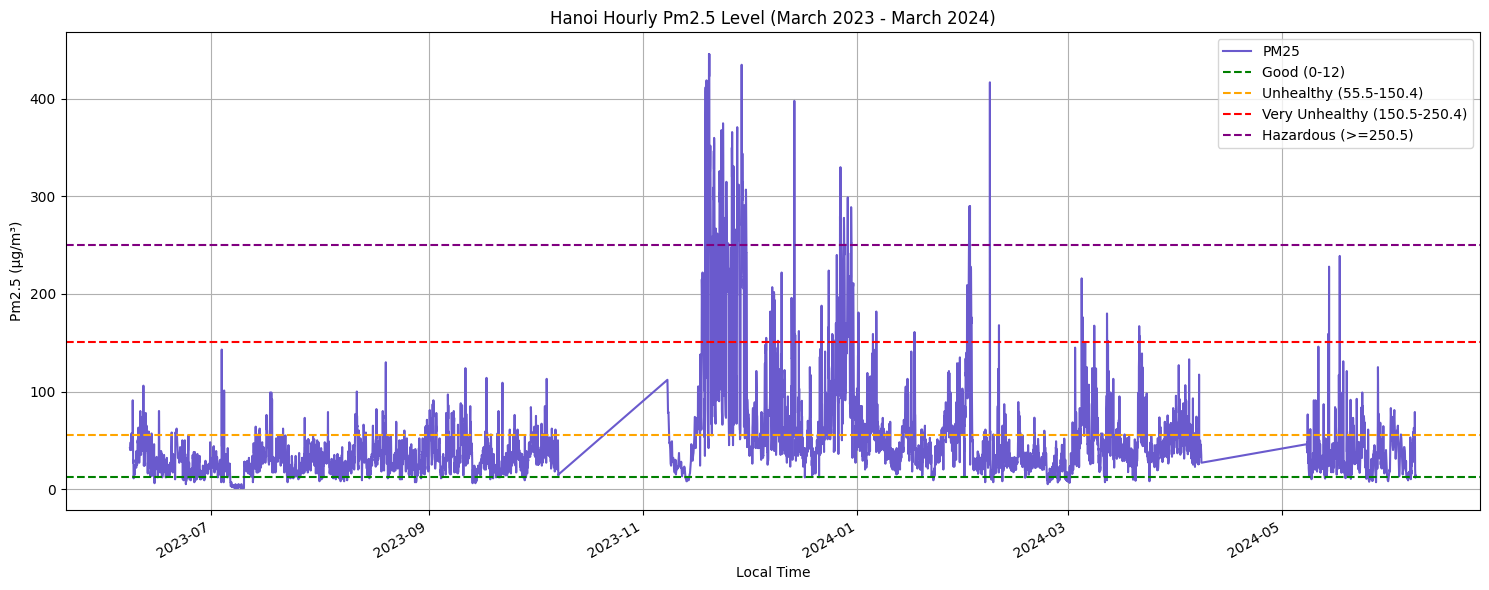

In [7]:
# Plot the AQI time series line plot
plt.figure(figsize=(15, 6))
df['PM25'].plot(kind='line', color='slateblue')

# Add labels and title
plt.xlabel('Local Time')
plt.ylabel('Pm2.5 (μg/m³)')
plt.title('Hanoi Hourly Pm2.5 Level (March 2023 - March 2024)')
# Add horizontal lines for unhealthy levels
plt.axhline(y=12, color='green', linestyle='--', label='Good (0-12)')
plt.axhline(y=55.5, color='orange', linestyle='--', label='Unhealthy (55.5-150.4)')
plt.axhline(y=150.5, color='red', linestyle='--', label='Very Unhealthy (150.5-250.4)')
plt.axhline(y=250.5, color='purple', linestyle='--', label='Hazardous (>=250.5)')
# Show legend
plt.legend()
# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

3.3.2. Hours with highest PM2.5 concentrations

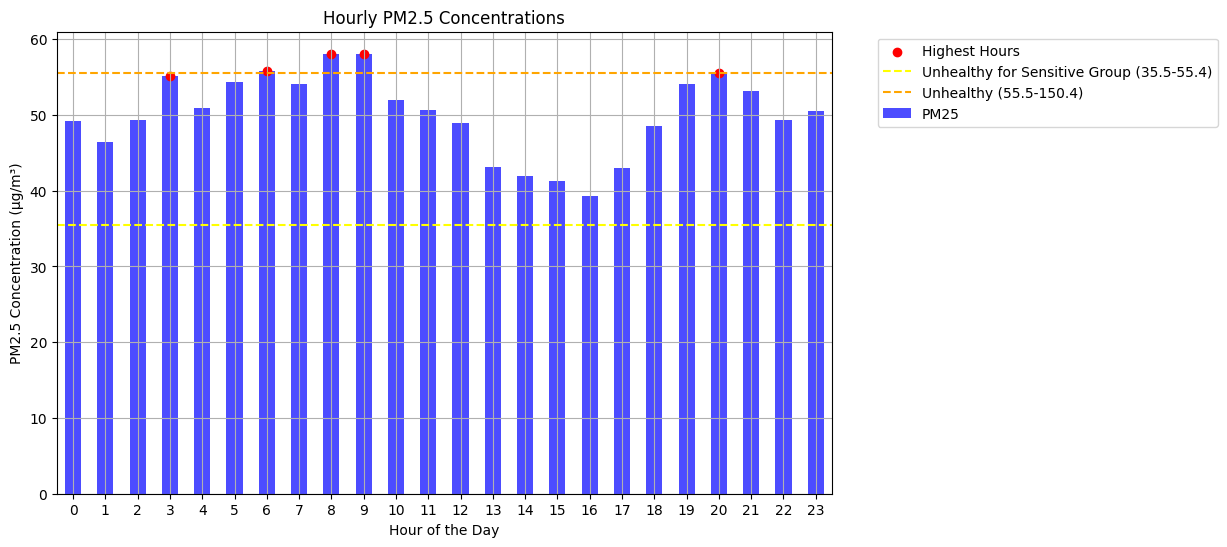

PM2.5 concentration at hour 8: 58.07
PM2.5 concentration at hour 9: 58.01
PM2.5 concentration at hour 19: 54.03
PM2.5 concentration at hour 20: 55.55
PM2.5 concentration at hour 21: 53.18


In [8]:
# Group data by hour and calculate mean PM2.5 concentration for each hour
hourly_pm25 = df['PM25'].groupby(df.index.hour).mean()

# Find hours with highest PM2.5 concentrations
highest_hours = hourly_pm25.nlargest(5)  # Change 5 to the number of highest hours you want to display

# Plot graph
plt.figure(figsize=(10, 6))
hourly_pm25.plot(kind='bar', color='blue', alpha=0.7)  # Plot hourly PM2.5 concentrations
plt.scatter(highest_hours.index, highest_hours.values, color='red', label='Highest Hours')  # Mark highest hours with red dots
plt.title('Hourly PM2.5 Concentrations')
plt.xlabel('Hour of the Day')
plt.ylabel('PM2.5 Concentration (μg/m³)')
plt.axhline(y=35.5, color='yellow', linestyle='--', label='Unhealthy for Sensitive Group (35.5-55.4)')
plt.axhline(y=55.5, color='orange', linestyle='--', label='Unhealthy (55.5-150.4)')

# Move the legend to the upper left corner outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)

# Rotate x-axis labels vertically
plt.xticks(rotation='horizontal')

plt.show()

# List of specific hours
specific_hours = [8, 9, 19, 20, 21]

# Print PM2.5 concentrations at specific hours
for hour in specific_hours:
    pm25_concentration = hourly_pm25.loc[hour]
    print(f"PM2.5 concentration at hour {hour}: {pm25_concentration:.2f}")

3.3.3. Average Pm2.5 per season

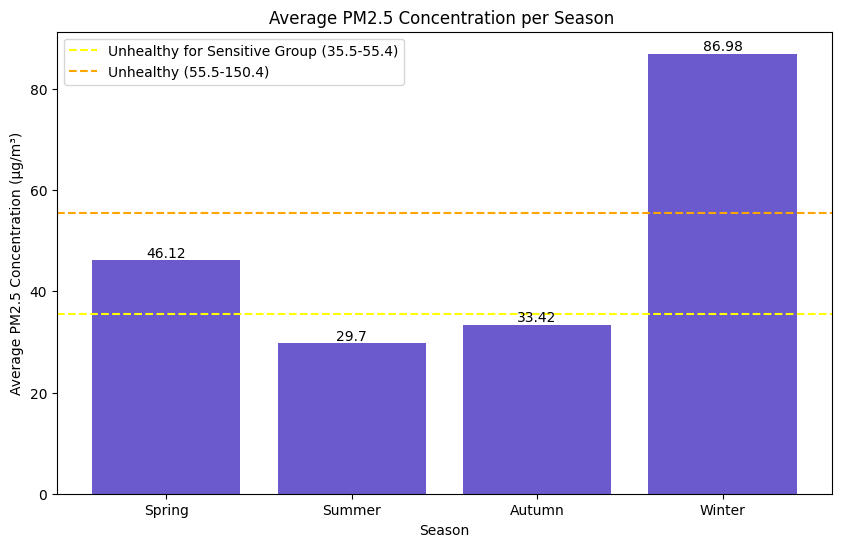

In [9]:
# Define seasons
seasons = {
    'Spring': [2, 3, 4],
    'Summer': [5, 6, 7],
    'Autumn': [8, 9, 10],
    'Winter': [11, 12, 1]
}

# Group data by season and calculate average PM2.5 concentration for each season
seasonal_pm25 = {}
for season, months in seasons.items():
    seasonal_pm25[season] = df.loc[df.index.month.isin(months), 'PM25'].mean()

# Plot the average PM2.5 concentration for each season
plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_pm25.keys(), seasonal_pm25.values(), color='slateblue')
plt.title('Average PM2.5 Concentration per Season ')
plt.xlabel('Season')
plt.ylabel('Average PM2.5 Concentration (μg/m³)')
plt.axhline(y=35.5, color='yellow', linestyle='--', label='Unhealthy for Sensitive Group (35.5-55.4)')
plt.axhline(y=55.5, color='orange', linestyle='--', label='Unhealthy (55.5-150.4)')
plt.legend()

# Annotate the bars with the average PM2.5 concentration values for each season
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2),
             ha='center', va='bottom')

plt.show()

#3.4. Precipitation

3.4.1. Hourly Precipitation Time Series

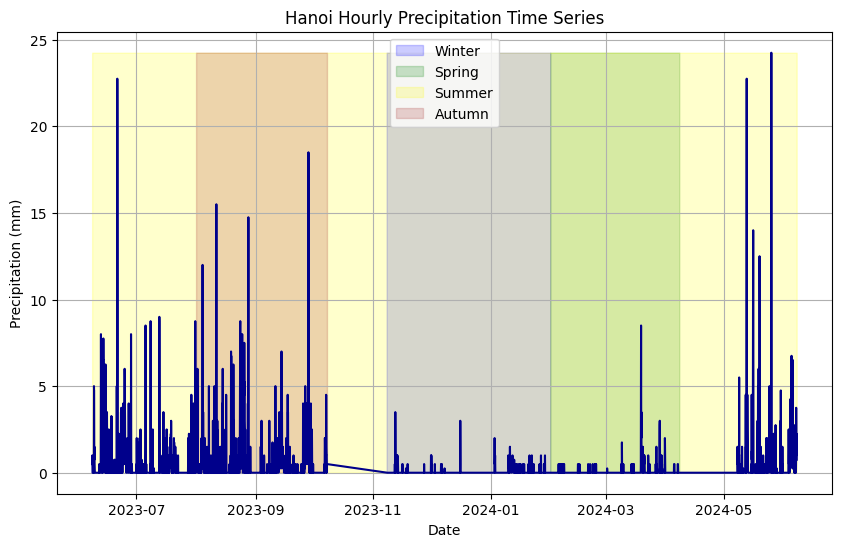

Annual Precipitation: 2625.75 mm


In [10]:
# Plot precipitation variable
plt.figure(figsize=(10, 6))

# Define seasons (assuming meteorological seasons: winter, spring, summer, autumn)
winter_months = [11, 12, 1]
spring_months = [2, 3, 4]
summer_months = [5, 6, 7]
autumn_months = [8, 9, 10]

# Plot entire precipitation time series
plt.plot(df.index, df['Precipitation'], color='darkblue')

# Shade winter season
plt.fill_between(df.index[df.index.month.isin(winter_months)], df['Precipitation'].min(), df['Precipitation'].max(), color='blue', alpha=0.2, label='Winter')

# Shade spring season
plt.fill_between(df.index[df.index.month.isin(spring_months)], df['Precipitation'].min(), df['Precipitation'].max(), color='green', alpha=0.2, label='Spring')

# Shade summer season
plt.fill_between(df.index[df.index.month.isin(summer_months)], df['Precipitation'].min(), df['Precipitation'].max(), color='yellow', alpha=0.2, label='Summer')

# Shade autumn season
plt.fill_between(df.index[df.index.month.isin(autumn_months)], df['Precipitation'].min(), df['Precipitation'].max(), color='brown', alpha=0.2, label='Autumn')

# Set title and labels
plt.title('Hanoi Hourly Precipitation Time Series')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# Group data by year and calculate total precipitation for each year
annual_total_precipitation = df['Precipitation'].sum()

print("Annual Precipitation:", annual_total_precipitation, "mm")

3.4.2. Hourly Precipitation Time Series

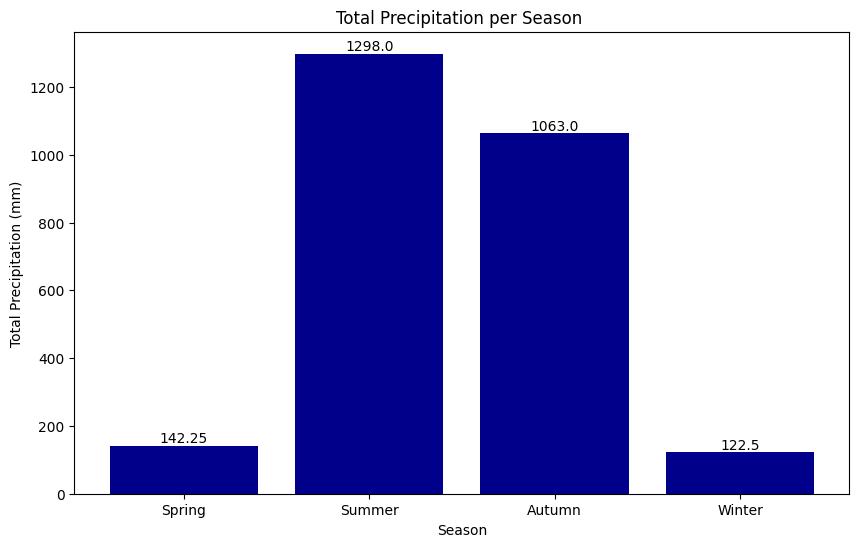

In [11]:
# Define seasons
seasons = {
    'Spring': [2, 3, 4],
    'Summer': [5, 6, 7],
    'Autumn': [8, 9, 10],
    'Winter': [11, 12, 1]
}

# Group data by season and calculate total precipitation for each season
seasonal_precipitation = {}
for season, months in seasons.items():
    seasonal_precipitation[season] = df.loc[df.index.month.isin(months), 'Precipitation'].sum()

# Plot the total precipitation for each season
plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_precipitation.keys(), seasonal_precipitation.values(), color='darkblue')
plt.title('Total Precipitation per Season ')
plt.xlabel('Season')
plt.ylabel('Total Precipitation (mm)')

# Annotate the bars with the total precipitation values for each season
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2),
             ha='center', va='bottom')

plt.show()

#3.5. Pressure

3.5.1. Hourly Pressure Time Series

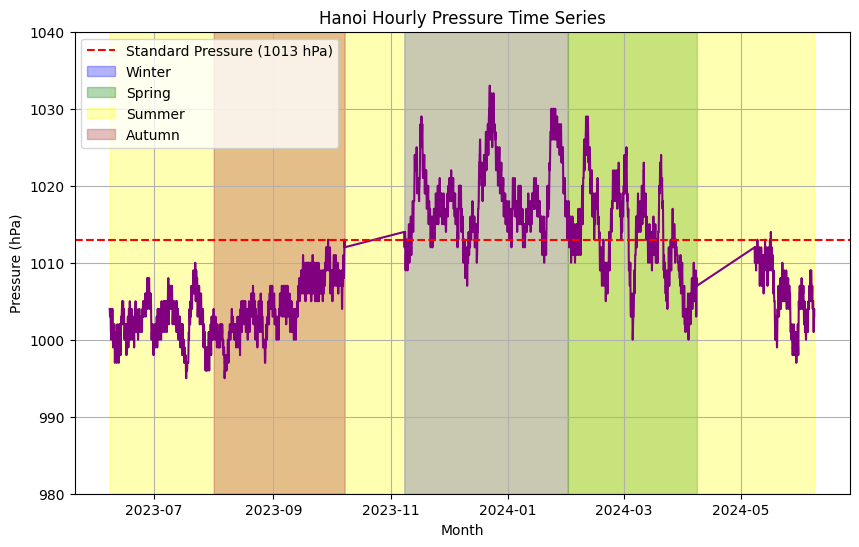

In [12]:
# Define seasons (assuming meteorological seasons: winter, spring, summer, autumn)
winter_months = [11, 12, 1]
spring_months = [2, 3, 4]
summer_months = [5, 6, 7]
autumn_months = [8, 9, 10]

# Plot pressure variable as a line plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(df.index, df['Pressure'], color='purple')  # Line plot

# Add a horizontal line at 1013 hPa with a label
plt.axhline(y=1013, color='red', linestyle='--', label='Standard Pressure (1013 hPa)')

# Shade winter season
plt.fill_between(df.index[df.index.month.isin(winter_months)], 980, 1040, color='blue', alpha=0.3, label='Winter')

# Shade spring season
plt.fill_between(df.index[df.index.month.isin(spring_months)], 980, 1040, color='green', alpha=0.3, label='Spring')

# Shade summer season
plt.fill_between(df.index[df.index.month.isin(summer_months)], 980, 1040, color='yellow', alpha=0.3, label='Summer')

# Shade autumn season
plt.fill_between(df.index[df.index.month.isin(autumn_months)], 980, 1040, color='brown', alpha=0.3, label='Autumn')

plt.title('Hanoi Hourly Pressure Time Series')  # Set the title
plt.xlabel('Month')  # Set the x-axis label
plt.ylabel('Pressure (hPa)')  # Set the y-axis label
plt.ylim(980, 1040)  # Set the y-axis limits
plt.grid(True)  # Add gridlines
plt.legend()  # Show legend
plt.show()  # Display the plot

3.5.2. Average Pressure per Season

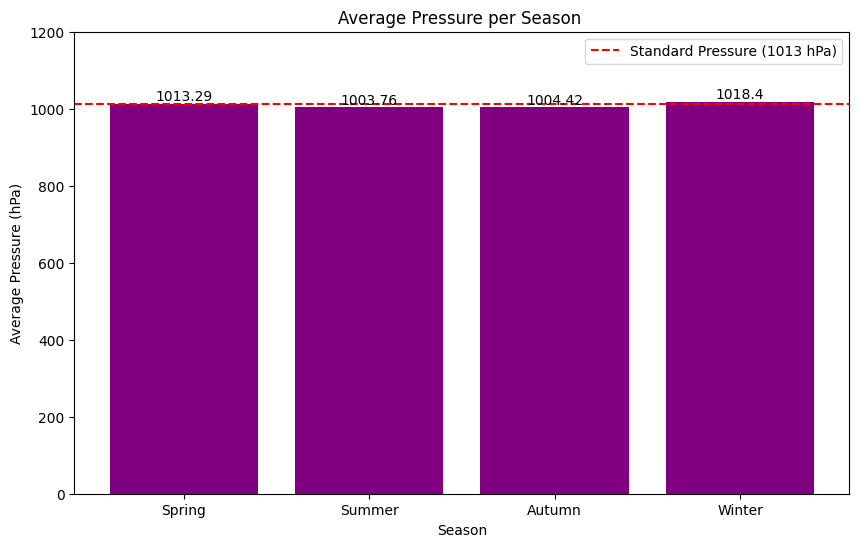

In [13]:
# Define seasons
seasons = {
    'Spring': [2, 3, 4],
    'Summer': [5, 6, 7],
    'Autumn': [8, 9, 10],
    'Winter': [11, 12, 1]
}

# Group data by season and calculate average humidity for each season
seasonal_humid = {}
for season, months in seasons.items():
    seasonal_humid[season] = df.loc[df.index.month.isin(months), 'Pressure'].mean()

# Plot the average humidity for each season
plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_humid.keys(), seasonal_humid.values(), color='purple')
plt.axhline(y=1013, color='red', linestyle='--', label='Standard Pressure (1013 hPa)')
plt.title('Average Pressure per Season ')
plt.xlabel('Season')
plt.ylabel('Average Pressure (hPa)')
plt.ylim(0, 1200)  # Set the y-axis limits

# Annotate the bars with the average humidity values for each season
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2),
             ha='center', va='bottom')
plt.legend()  # Show legend
plt.show()

#3.6. Humidity

3.6.1. Hourly Humidity Time Series

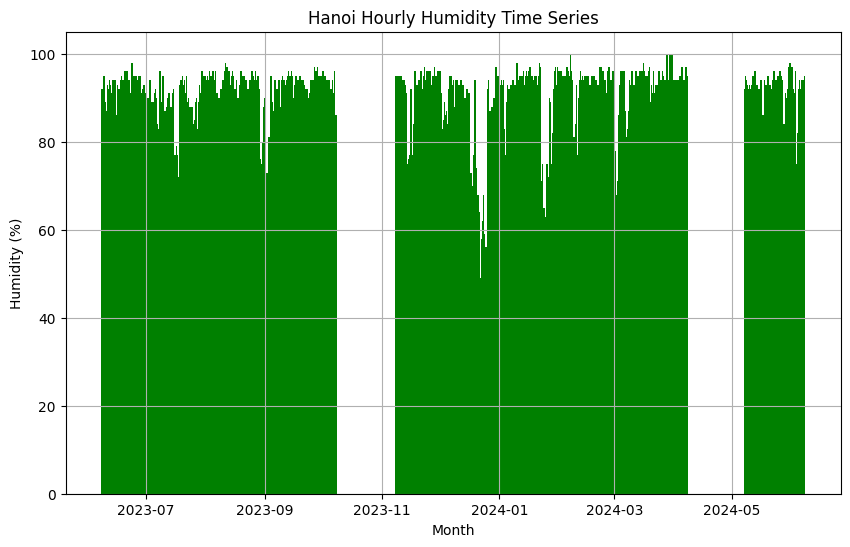

Average Annual Relative Humidity: 79.27 %


In [14]:
# Plot humidity variable
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(df.index, df['Relative Humidity'], color='green', linestyle='-')  # Line plot
plt.title('Hanoi Hourly Humidity Time Series')  # Set the title
plt.xlabel('Month')  # Set the x-axis label
plt.ylabel('Humidity (%)')  # Set the y-axis label
plt.grid(True)  # Add gridlines
plt.show()  # Display the plot

# Calculate the average of the annual mean relative humidity values
average_annual_rh = df["Relative Humidity"].mean()

print("Average Annual Relative Humidity:", round(average_annual_rh, 2), '%')

3.6.2. Average Humidity per Season

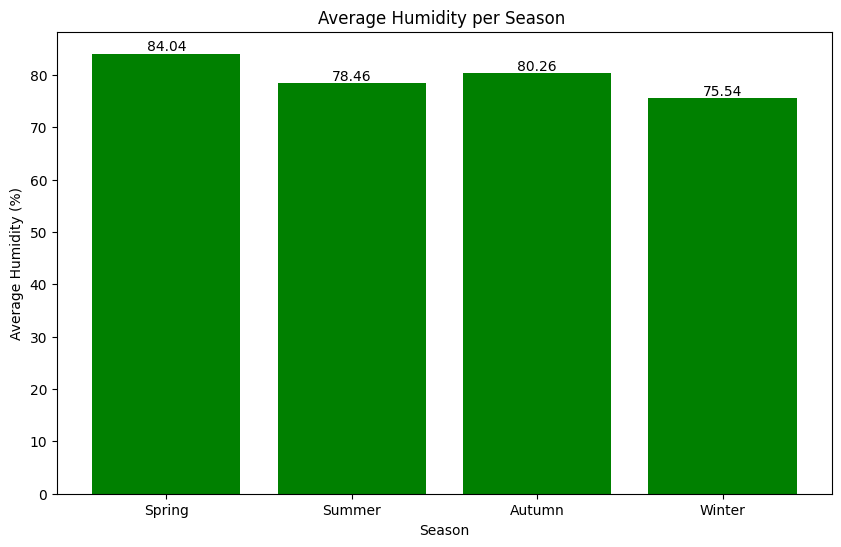

In [15]:
# Define seasons
seasons = {
    'Spring': [2, 3, 4],
    'Summer': [5, 6, 7],
    'Autumn': [8, 9, 10],
    'Winter': [11, 12, 1]
}

# Group data by season and calculate average humidity for each season
seasonal_humid = {}
for season, months in seasons.items():
    seasonal_humid[season] = df.loc[df.index.month.isin(months), 'Relative Humidity'].mean()

# Plot the average humidity for each season
plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_humid.keys(), seasonal_humid.values(), color='green')
plt.title('Average Humidity per Season ')
plt.xlabel('Season')
plt.ylabel('Average Humidity (%)')

# Annotate the bars with the average humidity values for each season
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2),
             ha='center', va='bottom')

plt.show()

#3.7. Temperature

3.7.1. Hourly Temperature Time Series

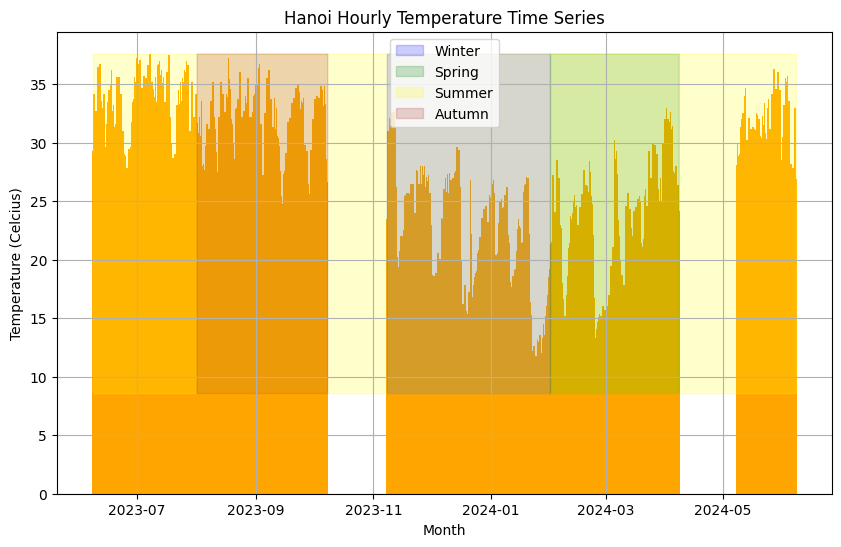

Average Annual Temperature: 25.04 ℃ 



In [16]:
# Define seasons (assuming meteorological seasons: winter, spring, summer, autumn)
winter_months = [11, 12, 1]
spring_months = [2, 3, 4]
summer_months = [5, 6, 7]
autumn_months = [8, 9, 10]

# Plot temperature variable
plt.figure(figsize=(10, 6))

# Plot entire temperature time series
plt.bar(df.index, df['Temperature'], color='orange', linestyle='-')

# Shade winter season
plt.fill_between(df.index[df.index.month.isin(winter_months)], df['Temperature'].min(), df['Temperature'].max(), color='blue', alpha=0.2, label='Winter')

# Shade spring season
plt.fill_between(df.index[df.index.month.isin(spring_months)], df['Temperature'].min(), df['Temperature'].max(), color='green', alpha=0.2, label='Spring')

# Shade summer season
plt.fill_between(df.index[df.index.month.isin(summer_months)], df['Temperature'].min(), df['Temperature'].max(), color='yellow', alpha=0.2, label='Summer')

# Shade autumn season
plt.fill_between(df.index[df.index.month.isin(autumn_months)], df['Temperature'].min(), df['Temperature'].max(), color='brown', alpha=0.2, label='Autumn')

# Set title and labels
plt.title('Hanoi Hourly Temperature Time Series')
plt.xlabel('Month')
plt.ylabel('Temperature (Celcius)')

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

average_annual_temperature = df['Temperature'].mean()

# Print the average annual temperature
print("Average Annual Temperature:", round(average_annual_temperature, 2), "℃ \n")

3.7.2. Average Temperature per Season

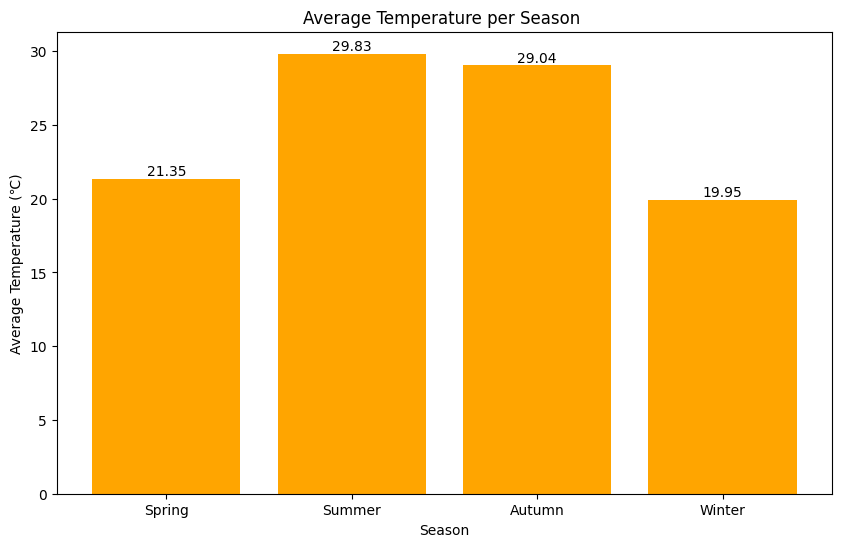

In [17]:
# Define seasons
seasons = {
    'Spring': [2, 3, 4],
    'Summer': [5, 6, 7],
    'Autumn': [8, 9, 10],
    'Winter': [11, 12, 1]
}

# Group data by season and calculate average temperature for each season
seasonal_temp = {}
for season, months in seasons.items():
    seasonal_temp[season] = df.loc[df.index.month.isin(months), 'Temperature'].mean()

# Plot the average temperature for each season
plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_temp.keys(), seasonal_temp.values(), color='orange')
plt.title('Average Temperature per Season ')
plt.xlabel('Season')
plt.ylabel('Average Temperature (℃)')

# Annotate the bars with the average temperature values for each season
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2),
             ha='center', va='bottom')

plt.show()

#3.8. Wind Speed

3.8.1. Hourly Wind Speed Time Series

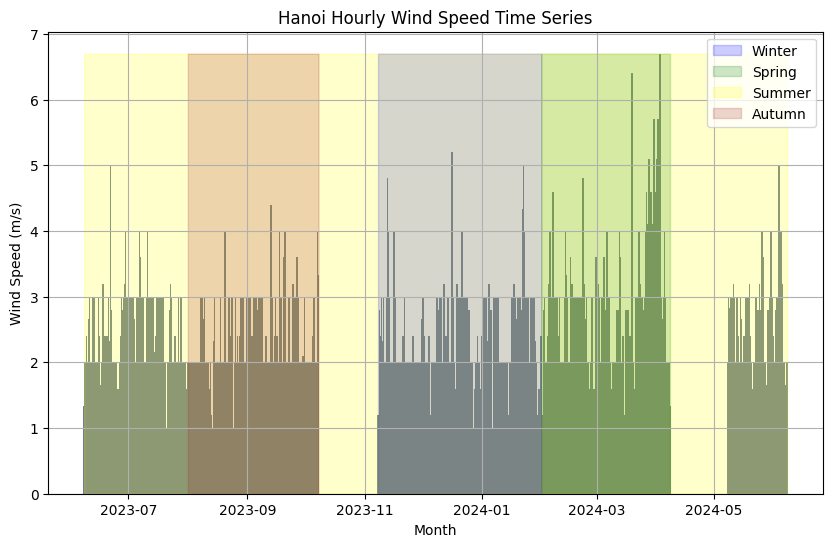

Average Annual Wind Speed: 1.55 m/s



In [18]:
# Define seasons (assuming meteorological seasons: winter, spring, summer, autumn)
winter_months = [11, 12, 1]
spring_months = [2, 3, 4]
summer_months = [5, 6, 7]
autumn_months = [8, 9, 10]

# Plot wind speed variable
plt.figure(figsize=(10, 6))

# Plot entire wind speed time series
plt.bar(df.index, df['Wind Speed'], color='slategray', linestyle='-')

# Shade winter season
plt.fill_between(df.index[df.index.month.isin(winter_months)], df['Wind Speed'].min(), df['Wind Speed'].max(), color='blue', alpha=0.2, label='Winter')

# Shade spring season
plt.fill_between(df.index[df.index.month.isin(spring_months)], df['Wind Speed'].min(), df['Wind Speed'].max(), color='green', alpha=0.2, label='Spring')

# Shade summer season
plt.fill_between(df.index[df.index.month.isin(summer_months)], df['Wind Speed'].min(), df['Wind Speed'].max(), color='yellow', alpha=0.2, label='Summer')

# Shade autumn season
plt.fill_between(df.index[df.index.month.isin(autumn_months)], df['Wind Speed'].min(), df['Wind Speed'].max(), color='brown', alpha=0.2, label='Autumn')

# Set title and labels
plt.title('Hanoi Hourly Wind Speed Time Series')
plt.xlabel('Month')
plt.ylabel('Wind Speed (m/s)')

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# Calculate the average annual wind speed
average_annual_wind_speed = df['Wind Speed'].mean()

# Print the average annual wind speed
print("Average Annual Wind Speed:", round(average_annual_wind_speed, 2), "m/s\n")

3.8.2. Average Wind Speed per Season

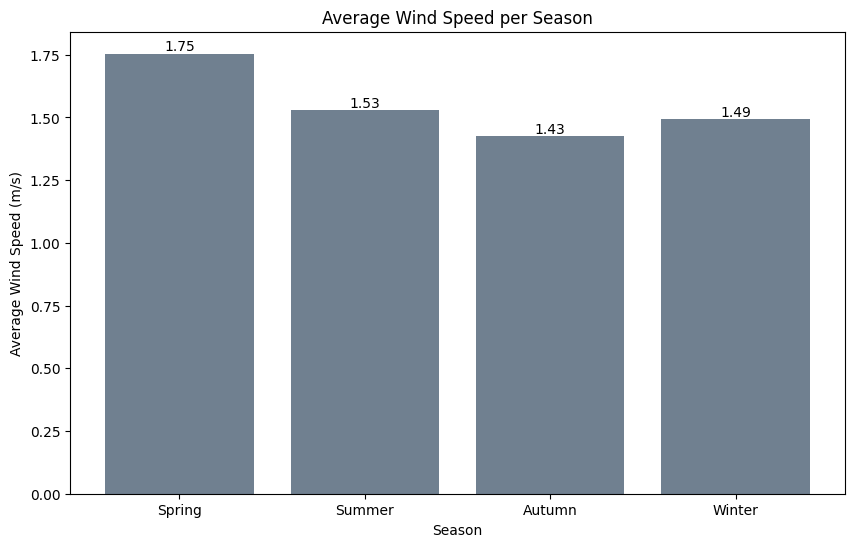

In [19]:
# Define seasons
seasons = {
    'Spring': [2, 3, 4],
    'Summer': [5, 6, 7],
    'Autumn': [8, 9, 10],
    'Winter': [11, 12, 1]
}

# Group data by season and calculate average wind speed for each season
seasonal_wind_speed = {}
for season, months in seasons.items():
    seasonal_wind_speed[season] = df.loc[df.index.month.isin(months), 'Wind Speed'].mean()

# Plot the average wind speed for each season
plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_wind_speed.keys(), seasonal_wind_speed.values(), color='slategray')
plt.title('Average Wind Speed per Season')
plt.xlabel('Season')
plt.ylabel('Average Wind Speed (m/s)')

# Annotate the bars with the average wind speed values for each season
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2),
             ha='center', va='bottom')

plt.show()

##4: The Effect of Weather Conditions on Air Quality

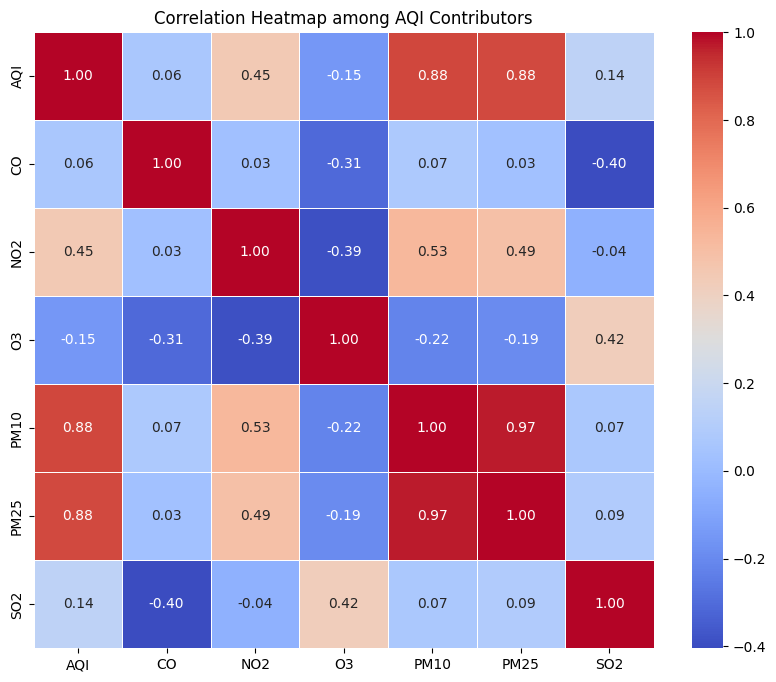

In [20]:
# Select the relevant columns
corr_columns = ['AQI', 'CO', 'NO2', 'O3', 'PM10', 'PM25', 'SO2']

# Calculate the correlation matrix
correlation_matrix = df[corr_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap among AQI Contributors')
plt.show()


4.1. Calculate the Cumulated Hours of Rain

In [21]:
# Initialize a variable to store the accumulated hours of rain
accumulated_hours_of_rain = 0

# Create an empty list to store the accumulated hours for each row
accumulated_hours_list = []

# Iterate through each row in the DataFrame
for precipitation in df['Precipitation']:
    # If it's raining in the current hour
    if precipitation > 0:
        # Increment the accumulated hours
        accumulated_hours_of_rain += 1
    else:
        # If it's not raining, reset the accumulated hours to zero
        accumulated_hours_of_rain = 0

    # Append the accumulated hours to the list
    accumulated_hours_list.append(accumulated_hours_of_rain)

# Add the list as a new column in the DataFrame
df['Accumulated Hours of Rain'] = accumulated_hours_list

df.head()

,UTC Time,City,Country Code,Timezone,AQI,CO,NO2,O3,PM10,PM25,SO2,Clouds,Precipitation,Pressure,Relative Humidity,Temperature,UV Index,Wind Speed,Accumulated Hours of Rain
Local Time,,,,,,,,,,,,,,,,,,,
2023-06-08 00:00:00,2023-06-07T17:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,118,168.7,32.3,74.7,52.5,42.0,57.3,37,0.5,1004,87,29.3,0.0,1.33,1
2023-06-08 01:00:00,2023-06-07T18:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,115,169.8,32.0,66.0,51.3,41.0,64.0,50,1.0,1004,88,29.0,0.0,1.00,2
2023-06-08 02:00:00,2023-06-07T19:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,112,166.7,29.3,63.7,50.0,40.0,66.0,62,1.0,1003,89,28.9,0.0,0.66,3
2023-06-08 03:00:00,2023-06-07T20:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,121,163.6,26.7,61.3,53.8,43.0,68.0,75,0.5,1003,90,28.7,0.0,0.33,4
2023-06-08 04:00:00,2023-06-07T21:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,134,160.5,24.0,59.0,60.0,48.0,70.0,87,0.0,1003,92,28.6,0.0,1.20,0


In [22]:
#Check summary statistics of 'Accumulated Hours of Rain' column
print(df['Accumulated Hours of Rain'].describe())

count    7323.000000
mean        2.083845
std         6.827253
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        67.000000
Name: Accumulated Hours of Rain, dtype: float64


4.2. Relationship Between Precipitation Hours and PM2.5 Level

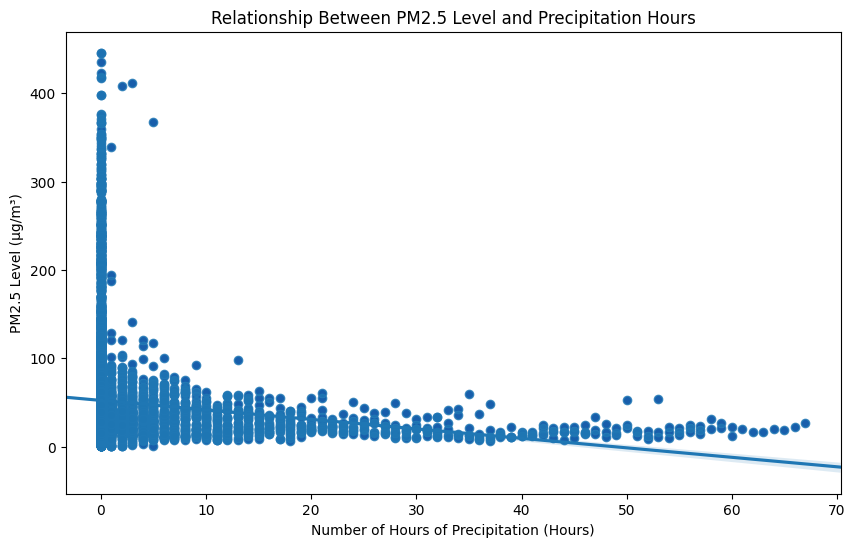

Correlation Coefficient: -0.14


In [23]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Accumulated Hours of Rain', y='PM25', color='darkblue')

# Draw regression line in red
sns.regplot(data=df, x='Accumulated Hours of Rain', y='PM25', truncate=False)

# Calculate correlation
correlation_coefficient = df['Accumulated Hours of Rain'].corr(df['PM25'])

# Add title and labels
plt.title('Relationship Between PM2.5 Level and Precipitation Hours')
plt.xlabel('Number of Hours of Precipitation (Hours)')
plt.ylabel('PM2.5 Level (μg/m³)')

plt.show()

# Print correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

4.3. Relationship Between Precipitation Amount and PM2.5 Level

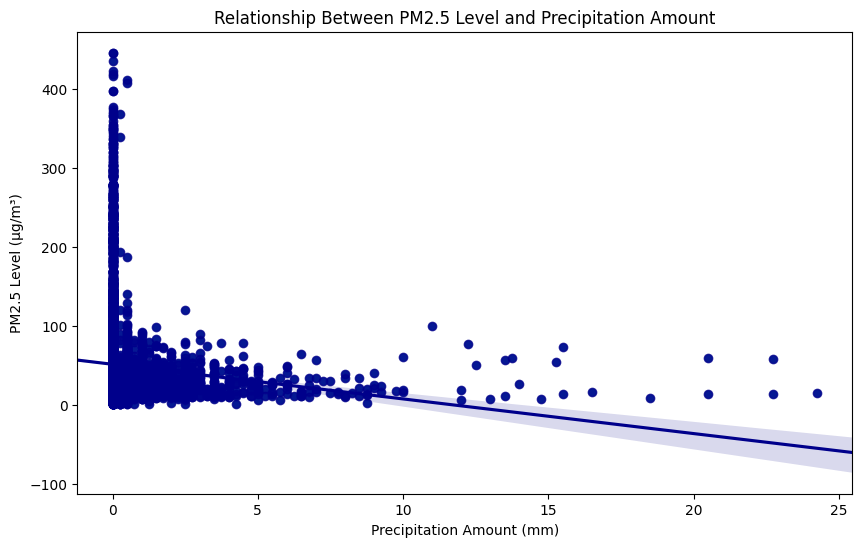

Correlation Coefficient: -0.11


In [24]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Precipitation', y='PM25')

# Draw regression line
sns.regplot(data=df, x='Precipitation', y='PM25', truncate= False, color='darkblue')

# Calculate correlation
correlation_coefficient = df['Precipitation'].corr(df['PM25'])

# Add title and labels
plt.title('Relationship Between PM2.5 Level and Precipitation Amount')
plt.xlabel('Precipitation Amount (mm)')
plt.ylabel('PM2.5 Level (μg/m³)')

plt.show()

# Print correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

Does Pressure Affect Air Quality?

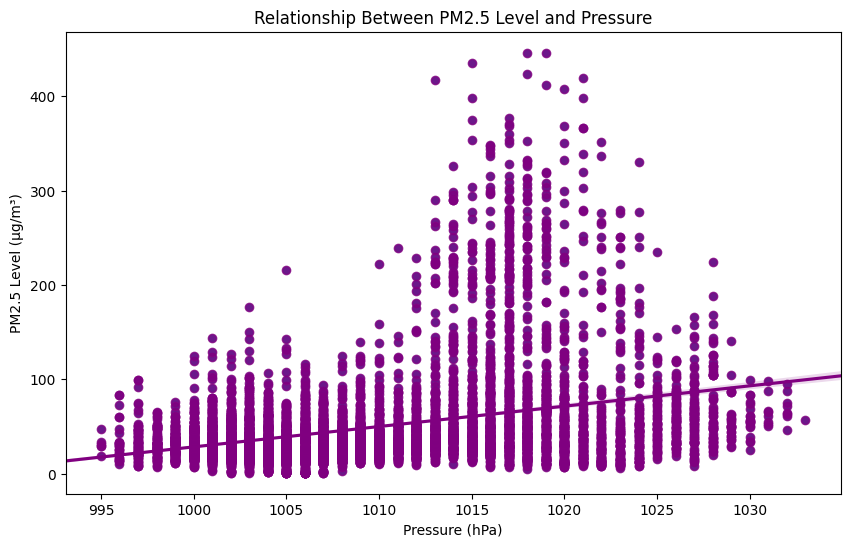

Correlation Coefficient: 0.33


In [25]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Pressure', y='PM25')

# Draw regression line
sns.regplot(data=df, x='Pressure', y='PM25', truncate= False, color='purple')

# Calculate correlation
correlation_coefficient = df['Pressure'].corr(df['PM25'])

# Add title and labels
plt.title('Relationship Between PM2.5 Level and Pressure')
plt.xlabel('Pressure (hPa)')
plt.ylabel('PM2.5 Level (μg/m³)')

plt.show()

# Print correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

Does Humidity Affect Air Quality?

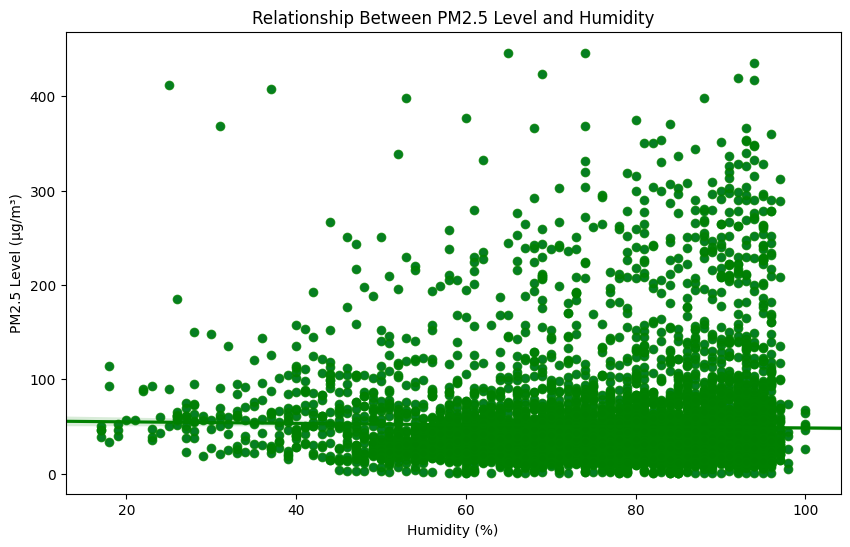

Correlation Coefficient: -0.02


In [26]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Relative Humidity', y='PM25')

# Draw regression line
sns.regplot(data=df, x='Relative Humidity', y='PM25', truncate= False, color='green')

# Calculate correlation
correlation_coefficient = df['Relative Humidity'].corr(df['PM25'])

# Add title and labels
plt.title('Relationship Between PM2.5 Level and Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('PM2.5 Level (μg/m³)')

plt.show()

# Print correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

Does Temperature Affect Air Quality?

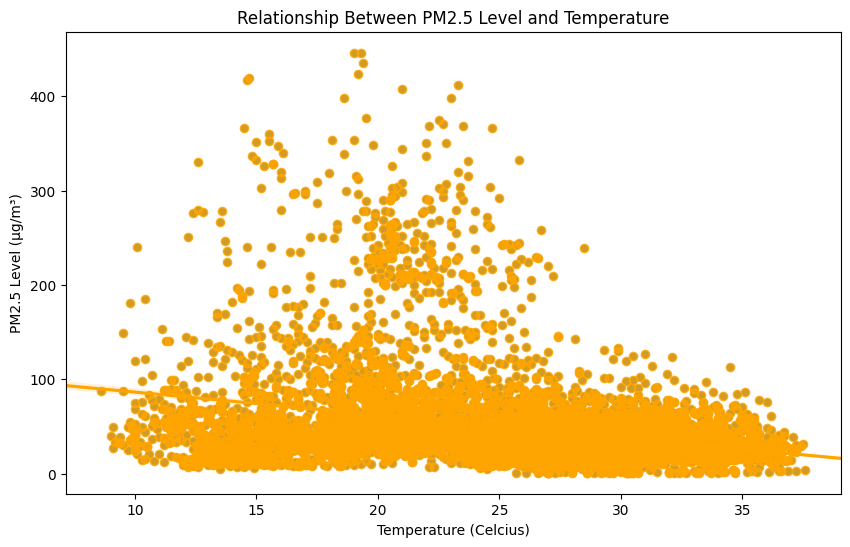

Correlation Coefficient: -0.28


In [27]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature', y='PM25')

# Draw regression line
sns.regplot(data=df, x='Temperature', y='PM25', truncate= False, color='orange')

# Calculate correlation
correlation_coefficient = df['Temperature'].corr(df['PM25'])

# Add title and labels
plt.title('Relationship Between PM2.5 Level and Temperature')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('PM2.5 Level (μg/m³)')

plt.show()

# Print correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

 Does Wind Speed Affect Air Quality?

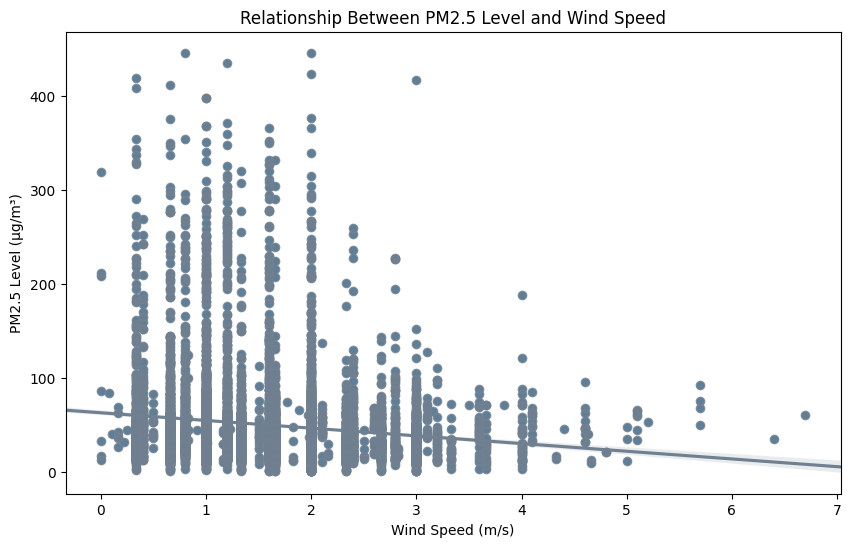

Correlation Coefficient: -0.13


In [28]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Wind Speed', y='PM25')

# Draw regression line
sns.regplot(data=df, x='Wind Speed', y='PM25', truncate= False, color='slategray')

# Calculate correlation
correlation_coefficient = df['Wind Speed'].corr(df['PM25'])

# Add title and labels
plt.title('Relationship Between PM2.5 Level and Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('PM2.5 Level (μg/m³)')

plt.show()

# Print correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")